In [1]:
from neuralnetwork.makemodel import feedforward_network,split_data
import pickle
import numpy as np

In [57]:
# Read the data
with open("ML_data_random.pkl", "rb") as f:
    data=pickle.load(f)

    X=[]
    Y=[]
    for key in data['measurements'].keys():
        vals=key.split("_")
        vals=[float(val) for val in vals]
        X.append(vals)
        Y.append(data['measurements'][key])

    random_X = np.array(X)
    random_Y = np.reshape(Y, (len(Y),1))

In [58]:
# And split it into train,test,validation (60,30,10)
X_train,X_test,X_val,Y_train,Y_test,Y_val=split_data(random_X,random_Y)

print(X_train.shape, X_test.shape, X_val.shape)
print(Y_train.shape, Y_test.shape, Y_val.shape)

(6060, 9) (3030, 9) (1010, 9)
(6060, 1) (3030, 1) (1010, 1)


training started at: = 15:23:24
Training time model: 13.75 seconds
0.009799039922654629
0.009142890572547913


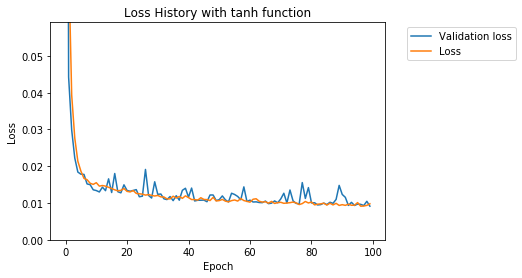

In [79]:
# Create a new network
network = feedforward_network()

# Train
history,_ = network.train(X_train, Y_train, epochs=100, batch_size=32,validation_data=(X_val,Y_val))
print(history.history['loss'][-1])
print(history.history['val_loss'][-1])

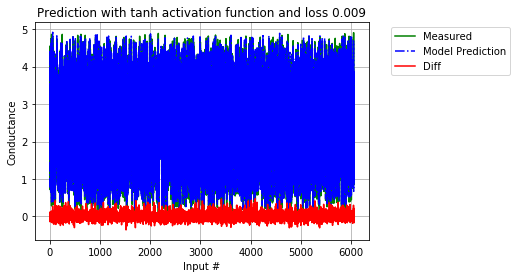

In [88]:
# Predict
predictions, loss, ax = network.predict(X_train, Y_train)

In [89]:
predictions = network.model.predict(X_val)
print("Manual: ", np.mean((Y_val - predictions)**2) )
loss = network.loss_func(Y_val, predictions).numpy()
print("Through keras loss: ", loss)

Manual:  0.009142890676356626
Through keras loss:  0.0091428915
